In [171]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import math
from scipy.signal import kaiserord, lfilter, firwin, freqz, medfilt
import numpy as np
import scipy.signal as signal


In [230]:
# Import der CSV Daten
dfx = pd.read_csv("./run/ID_001_Run  01_Complete_Run.csv", sep=",", decimal=".", encoding='ansi')
dfx = dfx.rename(columns=str.lower)
dfx.columns = dfx.columns.str.replace(' ','_')


df = dfx[(dfx["time_s"] >= 0) & (dfx["time_s"]<=30)]

# Tilt Angle berechnen -(math.degrees(math.atan(12/100)))
df["tilt_value"] = -(np.degrees(np.arctan(df["_acc_y_m/s2"]/df["_acc_x_m/s2"])))


# First, design the Buterworth filter
N  = 3    # Filter order
Wn = 0.01 # Cutoff frequency Hz
B, A = signal.butter(N, Wn, output='ba')
df['acc_x_smooth'] = signal.filtfilt(B,A, df["_acc_x_m/s2"])
df['acc_y_smooth'] = signal.filtfilt(B,A, df["_acc_y_m/s2"])
df['acc_z_smooth'] = signal.filtfilt(B,A, df["_acc_z_m/s2"])
# Tilt Angle berechnen -(math.degrees(math.atan(12/100)))
df['tilt_smooth'] = -(np.degrees(np.arctan((df['acc_y_smooth'])/(df['acc_x_smooth']))))

df.head()
#df.describe()

#pd.DataFrame(df).to_csv("c:/dev/test.csv",sep=";")

,time_s,_distance_m,_speed_km/h,_acc_x_m/s2,_acc_y_m/s2,_acc_z_m/s2,_roll_angle_°,_lightbeam,_lb_time_s_°_,tilt_value,acc_x_smooth,acc_y_smooth,acc_z_smooth,tilt_smooth
500,0.00,14.035,25.122,0.611,-0.019,9.906,0.360,S,0.000,1.781128,0.608204,-0.022523,9.667721,2.120778
501,0.01,14.105,25.162,0.600,-0.024,9.908,0.370,,,2.290610,0.609859,-0.022511,9.658222,2.113902
502,0.02,14.175,25.201,0.594,-0.027,9.907,0.380,,,2.602562,0.611483,-0.022501,9.648796,2.107403
503,0.03,14.245,25.241,0.592,-0.029,9.901,0.391,,,2.804477,0.613074,-0.022494,9.639452,2.101277
504,0.04,14.315,25.281,0.594,-0.030,9.891,0.401,,,2.891270,0.614633,-0.022489,9.630197,2.095519


In [231]:
# Modifizieren der Daten
plot_data = df.iloc[:,[0,1,2,6,9]]
plot_data.describe()

,time_s,_distance_m,_speed_km/h,_roll_angle_°,tilt_value
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,15.000000,250.484063,65.485540,0.429315,4.372369
std,8.664584,165.177884,17.011258,34.186253,64.890696
min,0.000000,14.035000,25.122000,-79.402000,-90.000000
25%,7.500000,96.648000,54.809000,-9.421000,-61.792509
50%,15.000000,235.525000,70.286000,0.092000,4.651108
75%,22.500000,392.976000,78.521000,9.912000,69.218888
max,30.000000,562.871000,87.395000,68.794000,90.000000


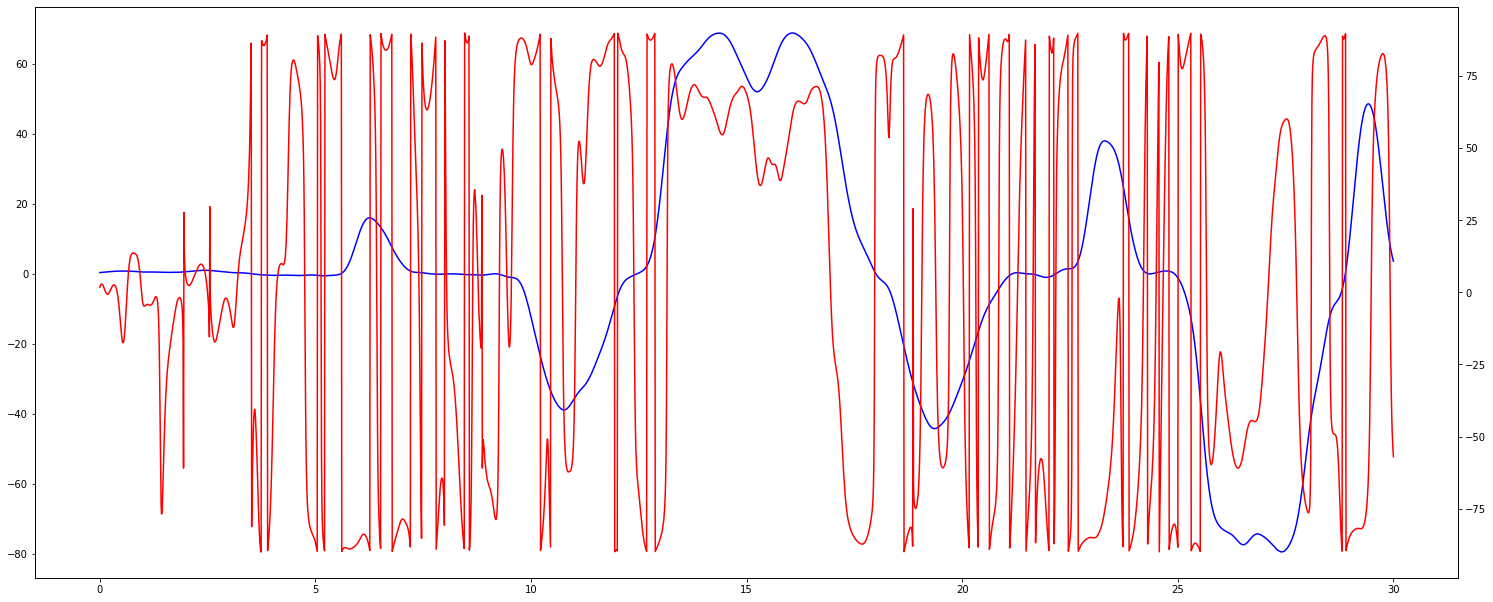

In [232]:
# Roll Angle muss jetzt ins psitive gewandelt werden

#plt.plot(plot_data.iloc[:,0],plot_data.iloc[:,3].abs(),'blue',plot_data.iloc[:,0],plot_data.iloc[:,2],"red")
fig, ax1 = plt.subplots()
fig.set_size_inches(25.5, 10.5)
ax2 = ax1.twinx()
#ax1.plot(plot_data.iloc[:,0],plot_data.iloc[:,3].abs(),'blue')
ax1.plot(plot_data.iloc[:,0],plot_data["_roll_angle_°"],'blue')
#ax2.plot(plot_data.iloc[:,0],plot_data.iloc[:,2],"red")
ax2.plot(plot_data.iloc[:,0],plot_data["tilt_value"],"red")
plt.show()



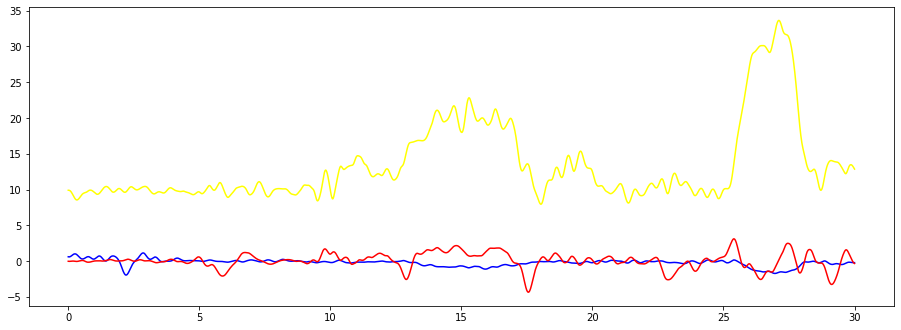

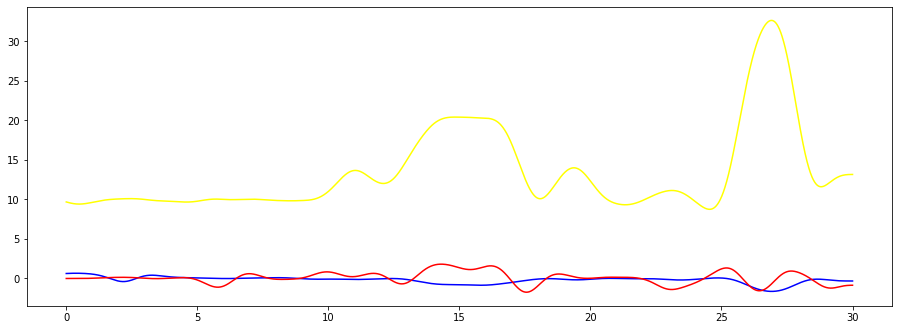

In [233]:

plt.figure(figsize=(15.5, 5.5))
plt.plot(df['time_s'],df["_acc_x_m/s2"],'blue',df['time_s'],df["_acc_y_m/s2"],'red',df['time_s'],df["_acc_z_m/s2"],'yellow')
plt.show()
plt.figure(figsize=(15.5, 5.5))
plt.plot(df['time_s'],df["acc_x_smooth"],'blue',df['time_s'],df["acc_y_smooth"],'red',df['time_s'],df["acc_z_smooth"],'yellow')
plt.show()
#plt.plot(df['time_s'],df["tilt_value"].abs(),'blue',df['time_s'],df["_acc_z_m/s2"],'yellow',df['time_s'],df["_roll_angle_°"].abs(),'black')
# smooth = scipy.signal.savgol_filter(df["_acc_z_m/s2"], 99, 3) # window size 51, polynomial order 3
#plt.plot(df['time_s'],df["_acc_x_m/s2"],'blue',df['time_s'],df["_acc_y_m/s2"],'red',df['time_s'],smooth,'yellow',df['time_s'],df["_roll_angle_°"].abs(),'black')

plt.show()

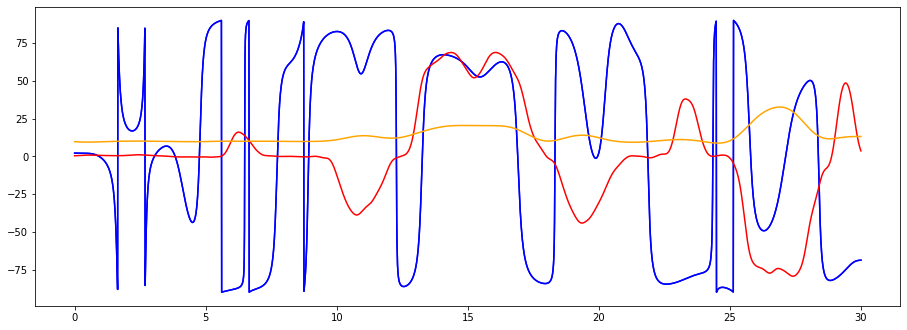

In [234]:
#tiltsmooth = scipy.signal.savgol_filter(df["tilt_value"], 99, 2, mode='nearest')
plt.figure(figsize=(15.5, 5.5))
plt.plot(df['time_s'],df['tilt_smooth'],'blue')
plt.plot(df['time_s'],df['tilt_smooth'],'blue',df['time_s'],df['_roll_angle_°'],'red',df['time_s'],df['acc_z_smooth'],'orange' )
plt.show()

https://raw.githubusercontent.com/DFRobot/DFRobotMediaWikiImage/master/Image/_Tilt_angle.png



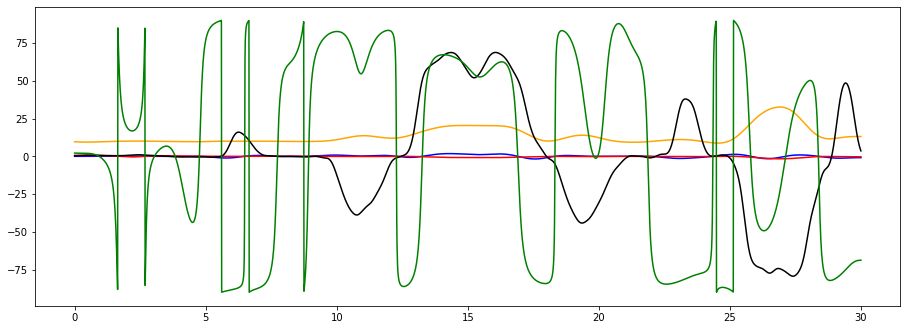

In [235]:
# https://itectec.com/electrical/electrical-how-to-choose-a-cut-off-frequency-by-interpreting-fft/
# https://www.engineeringtoolbox.com/banked-turn-d_1844.html
# https://www.bigrentz.com/blog/superelevation

plt.figure(figsize=(15.5, 5.5))
#plt.plot(rawdatax,'r-')
plt.plot(df['time_s'],df['acc_y_smooth'],'b-')
plt.plot(df['time_s'],df['acc_x_smooth'],'r-')
plt.plot(df['time_s'],df['acc_z_smooth'],'orange')
plt.plot(df['time_s'], df["_roll_angle_°"], "black")
plt.plot(df['time_s'], df['tilt_smooth'], "green")
plt.show()

<Figure size 432x288 with 0 Axes>

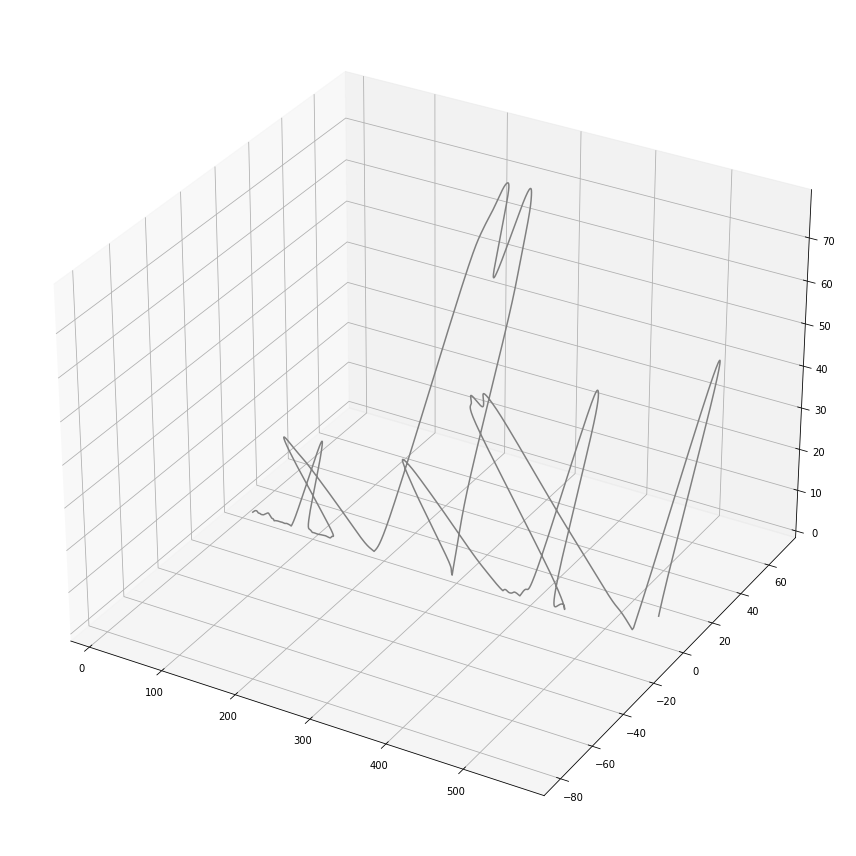

In [236]:
fig = plt.figure()
plt.figure(figsize=(25.5, 15.5))
ax = plt.axes(projection='3d')
#ax.plot3D(df['_acc_x_m/s2'], df['_acc_y_m/s2'],df['_acc_z_m/s2'], 'gray')
ax.plot3D(df['_distance_m'],df['_roll_angle_°'], df["_roll_angle_°"].abs(), 'gray')

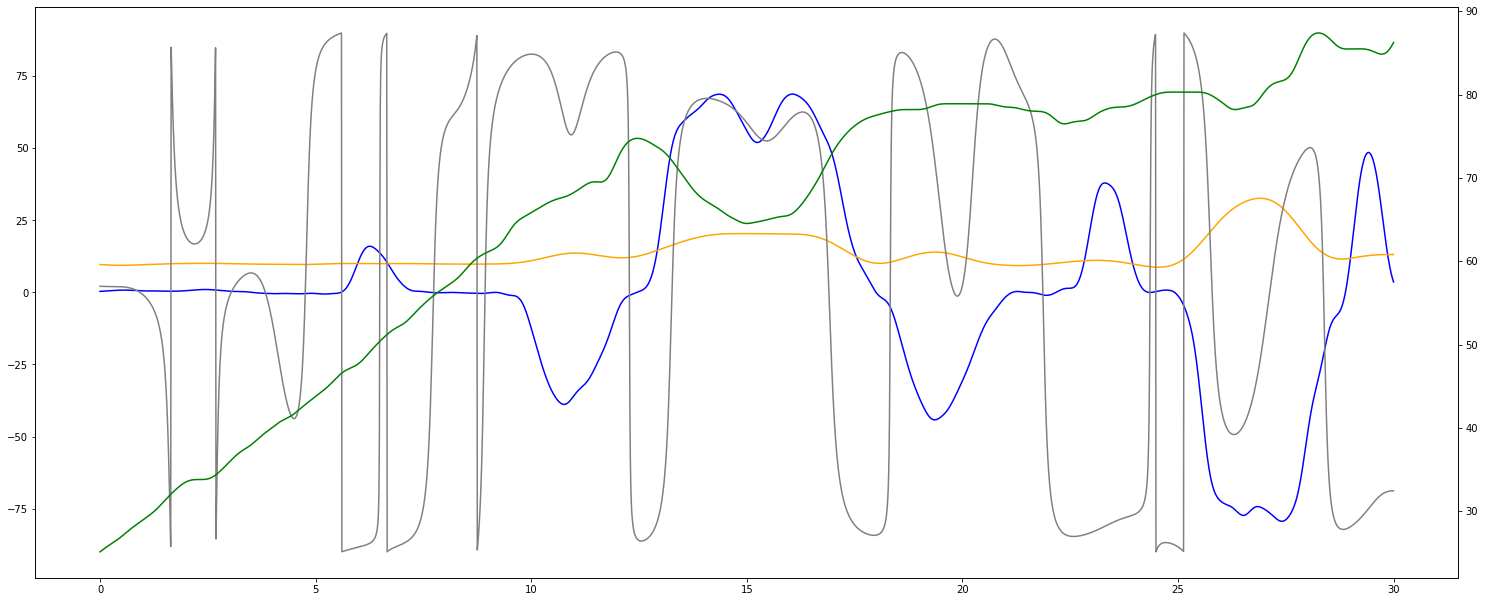

In [237]:
fig, ax1 = plt.subplots()
fig.set_size_inches(25.5, 10.5)
ax2 = ax1.twinx()

ax1.plot(df['time_s'],df["_roll_angle_°"],'blue',df['time_s'],df["acc_z_smooth"],'orange',df['time_s'],df["tilt_smooth"],'grey' )
#ax1.plot(df['time_s'],df["_roll_angle_°"],'blue',df['time_s'],df["acc_z_smooth"],'orange' )
ax2.plot(df['time_s'],df["_speed_km/h"],"green")
plt.show()

In [219]:
#Los geht es mit einer Linearen Regression
# time_s	_distance_m	_speed_km/h	_acc_x_m/s2	_acc_y_m/s2	_acc_z_m/s2	_roll_angle_°	tilt_value	acc_x_smooth	acc_y_smooth	acc_z_smooth	tilt_smooth
from sklearn.linear_model import LinearRegression
predictors = ['_distance_m','_roll_angle_°', 'tilt_value' ]
outcome = ['_speed_km/h']

bob_lm = LinearRegression().fit(df[predictors], df[outcome])


# The following section will get results by interpreting the created instance: 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = bob_lm.score(df[predictors], df[outcome])
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', bob_lm.intercept_)

# Print the Slope:
print('slope:', bob_lm.coef_) 

# Predict a Response and print it:
y_pred = bob_lm.predict(df[predictors])
print('Predicted response:', y_pred, sep='\n')

coefficient of determination: 0.8468775986358665
intercept: [34.92925692]
slope: [[ 0.15526907 -0.06774889  0.00641625]]
Predicted response:
[[37.09549689]
 [37.1089572 ]
 [37.12115011]
 ...
 [89.71465344]
 [89.68832137]
 [89.65152541]]


<function matplotlib.pyplot.show(close=None, block=None)>

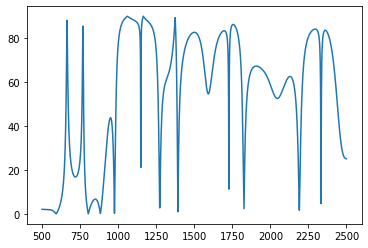

In [207]:
# Peaks müssen noch entfernt werden um z.B. die Fahrten an die Band zu eliminieren
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html --> Hat nicht zum Ziel geführt
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html --> Auch keine gute Lösung

def despike(yi, th=1.e-8):
#'''Remove spike from array yi, the spike area is where the difference between 
#  the neigboring points is higher than th.'''
  y = np.copy(yi) # use y = y1 if it is OK to modify input array
  n = len(y)
  x = np.arange(n)
  c = np.argmax(y)
  d = abs(np.diff(y))
  try:
    l = c - 1 - np.where(d[c-1::-1]<th)[0][0]
    r = c + np.where(d[c:]<th)[0][0] + 1
  except: # no spike, return unaltered array
    return y
  # for fit, use area twice wider then the spike
  if (r-l) <= 3:
    l -= 1
    r += 1
  s = int(round((r-l)/2.))
  lx = l - s
  rx = r + s
  # make a gap at spike area
  xgapped = np.concatenate((x[lx:l],x[r:rx]))
  ygapped = np.concatenate((y[lx:l],y[r:rx]))
  # quadratic fit of the gapped array
  z = np.polyfit(xgapped,ygapped,2)
  p = np.poly1d(z)
  y[l:r] = p(x[l:r])
  return y

#testx <- df['tilt_smooth']
test = despike(df['tilt_smooth'])

plt.plot(df['tilt_smooth'].abs())
plt.show

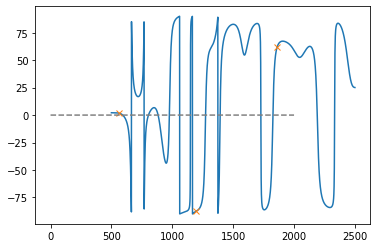

In [218]:
import matplotlib.pyplot as plt

from scipy.misc import electrocardiogram

from scipy.signal import find_peaks

x = df['tilt_smooth']

#peaks, _ = find_peaks(x, height=89)

peaks, _ = find_peaks(x, distance=400)

np.diff(peaks)

plt.plot(x)

plt.plot(peaks, x[peaks], "x")

plt.plot(np.zeros_like(x), "--", color="gray")

plt.show()



In [89]:
print(df[outcome])

      _speed_km/h
0          -0.000
1          -0.000
2          -0.000
3          -0.000
4          -0.000
...           ...
6562       72.913
6563       72.878
6564       72.841
6565       72.801
6566       72.759

[6567 rows x 1 columns]
